In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv('/Users/4yoboy/Downloads/lagos-rent.csv')

In [3]:
df.head()

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
0,Newly Built 4 Bedroom Semi Detached House With Bq,4 BEDROOM HOUSE FOR RENT,"5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets,Lekki,Agungi
1,Superb 4 Bedroom Semi Detached Duplex With Bq,4 BEDROOM HOUSE FOR RENT,"5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets,Lekki,Other Lekki
2,Furnished 2 Bedroom Terrace Duplex For Rent !!!,2 BEDROOM HOUSE FOR RENT,"3,500,000",1,0,0,2 beds,3 baths,3 Toilets,Lekki,Osapa London
3,2 Bedroom Apartment For Rent,2 BEDROOM HOUSE FOR RENT,"2,700,000",1,1,0,2 beds,3 baths,3 Toilets,Lekki,Ologolo
4,4 Bedroom Terrace Duplex For Rent,4 BEDROOM HOUSE FOR RENT,"4,000,000",1,0,0,4 beds,5 baths,5 Toilets,Lekki,Chevron


In [4]:
df.shape

(53070, 11)

In [5]:
df.Neighborhood = df.Neighborhood.apply(lambda x: x.strip())
location_stats = df.groupby('Neighborhood')['Neighborhood'].agg('count').sort_values(ascending=False)
len(location_stats)

69

In [6]:
df['Neighborhood'].unique()

array(['Agungi', 'Other Lekki', 'Osapa London', 'Ologolo', 'Chevron',
       'Lekki Phase 1', 'Ikate', 'Ikota', 'Other Ikoyi', 'Banana Island',
       'Old Ikoyi', 'Bourdillon', 'Osborne Foreshore Estate',
       'Parkview Estate', 'Dolphin Estate', 'Awolowo Road', 'Opebi',
       'Oregun', 'Adeniyi Jones', 'Other Ikeja', 'GRA', 'Allen Avenue',
       'Toyin street', 'alausa', 'Awolowo way', 'Other Victoria Island',
       'Oniru', 'Ligali Ayorinde', 'Victoria Island Extension', '1004',
       'Adeola Odeku', 'Omole Phase 1', 'Other Ojodu', 'Isheri North',
       'Ojodu Berger', 'Magodo Gra Phase 1', 'Omole Phase 2', 'Olowora',
       'Gbagada Phase 1', 'Other Gbagada', 'Medina', 'Ifako', 'Soluyi',
       'Millennium Ups', 'Oworonshoki', 'Gbagada Phase 2', 'Bode thomas',
       'Other Surulere', 'Adelabu', 'Marsha', 'Aguda', 'Ogunlana',
       'Ijesha', 'Lawanson', 'Randle Avenue', 'Ojuelegba', 'Lekki Scheme',
       'Other Ajah', 'Badore', 'Sangotedo', 'Ado', 'Onike', 'Other Yaba',
  

In [7]:
df['Bedrooms'].unique()

array(['4 beds', '2 beds', '3 beds', '5 beds', '1 beds', '6 beds',
       '0 beds', ' beds', '10 beds', '8 beds', '7 beds', '9 beds'],
      dtype=object)

In [8]:
df1 = df.drop(['Title', 'More Info'], axis = 'columns')

In [9]:
df1.head()

,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
0,"5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets,Lekki,Agungi
1,"5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets,Lekki,Other Lekki
2,"3,500,000",1,0,0,2 beds,3 baths,3 Toilets,Lekki,Osapa London
3,"2,700,000",1,1,0,2 beds,3 baths,3 Toilets,Lekki,Ologolo
4,"4,000,000",1,0,0,4 beds,5 baths,5 Toilets,Lekki,Chevron


In [10]:
df1.isna().sum()

Price           0
Serviced        0
Newly Built     0
Furnished       0
Bedrooms        0
Bathrooms       0
Toilets         0
City            0
Neighborhood    0
dtype: int64

In [11]:
#data cleaning and feature engineeering

In [12]:
def seperate(x):
    if x.split(' ')[0]:
        return int(x.split(' ')[0])
    else:
        return 0
    
def seperate_1(y):
   y_n_commas = y.replace(',', '')
   try:
        return int(y_n_commas.split('/')[0])
   except ValueError:
        return 0
    


 

In [13]:
df1['beds'] = df1['Bedrooms'].apply(seperate)
df1['bathrooms'] = df1['Bathrooms'].apply(seperate)
df1['toilets'] = df1['Toilets'].apply(seperate)
df1['price'] = df1['Price'].apply(seperate_1)

In [14]:
df1.head()

,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood,beds,bathrooms,toilets,price
0,"5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets,Lekki,Agungi,4,4,5,5000000
1,"5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets,Lekki,Other Lekki,4,4,5,5000000
2,"3,500,000",1,0,0,2 beds,3 baths,3 Toilets,Lekki,Osapa London,2,3,3,3500000
3,"2,700,000",1,1,0,2 beds,3 baths,3 Toilets,Lekki,Ologolo,2,3,3,2700000
4,"4,000,000",1,0,0,4 beds,5 baths,5 Toilets,Lekki,Chevron,4,5,5,4000000


In [15]:
df2 = df1.copy()


In [16]:
#features_engineering

In [17]:
df2.head()

,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood,beds,bathrooms,toilets,price
0,"5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets,Lekki,Agungi,4,4,5,5000000
1,"5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets,Lekki,Other Lekki,4,4,5,5000000
2,"3,500,000",1,0,0,2 beds,3 baths,3 Toilets,Lekki,Osapa London,2,3,3,3500000
3,"2,700,000",1,1,0,2 beds,3 baths,3 Toilets,Lekki,Ologolo,2,3,3,2700000
4,"4,000,000",1,0,0,4 beds,5 baths,5 Toilets,Lekki,Chevron,4,5,5,4000000


In [18]:
df2['City'].unique()

array(['Lekki', 'Ikoyi', 'Ikeja', 'Island', 'Ojodu', 'Gbagada',
       'Surulere', 'Ajah', 'Yaba'], dtype=object)

In [19]:
df2['beds'].unique()

array([ 4,  2,  3,  5,  1,  6,  0, 10,  8,  7,  9])

In [20]:
df2['Neighborhood'].nunique()

69

In [21]:
df2['City'].value_counts()

Lekki       19150
Ajah         6258
Yaba         5018
Ojodu        4695
Ikoyi        4366
Surulere     3835
Gbagada      3554
Ikeja        3531
Island       2663
Name: City, dtype: int64

In [22]:
df2['Neighborhood'].value_counts()

Lekki Phase 1      5262
Other Lekki        3880
Other Ajah         2639
Chevron            2511
Ikate              2047
                   ... 
alausa              130
Awolowo Road         96
Ligali Ayorinde      93
Dolphin Estate       77
1004                 73
Name: Neighborhood, Length: 69, dtype: int64

In [23]:
len(df2)

53070

In [24]:
#outliers removal

In [25]:
df2.head(10)

,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood,beds,bathrooms,toilets,price
0,"5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets,Lekki,Agungi,4,4,5,5000000
1,"5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets,Lekki,Other Lekki,4,4,5,5000000
2,"3,500,000",1,0,0,2 beds,3 baths,3 Toilets,Lekki,Osapa London,2,3,3,3500000
3,"2,700,000",1,1,0,2 beds,3 baths,3 Toilets,Lekki,Ologolo,2,3,3,2700000
4,"4,000,000",1,0,0,4 beds,5 baths,5 Toilets,Lekki,Chevron,4,5,5,4000000
5,"3,500,000",1,1,0,3 beds,3 baths,4 Toilets,Lekki,Chevron,3,3,4,3500000
6,"15,000,000/year",0,0,1,5 beds,6 baths,7 Toilets,Lekki,Lekki Phase 1,5,6,7,15000000
7,"6,500,000",0,1,0,5 beds,6 baths,6 Toilets,Lekki,Agungi,5,6,6,6500000
8,"8,000,000/year",1,1,1,2 beds,2 baths,2 Toilets,Lekki,Ikate,2,2,2,8000000
9,"5,000,000",0,0,0,4 beds,5 baths,5 Toilets,Lekki,Chevron,4,5,5,5000000


In [26]:
#first, observing price 

In [27]:
df2.price.describe()

count    5.307000e+04
mean     4.297018e+07
std      7.383023e+09
min      1.000000e+00
25%      9.000000e+05
50%      2.000000e+06
75%      4.500000e+06
max      1.700000e+12
Name: price, dtype: float64

In [28]:
#removing illogical outliers in price

In [29]:
from scipy import stats

z_scores = stats.zscore(df2['price'])
outliers = np.abs(z_scores) > 3
df_no_outliers = df2[~outliers]



In [30]:
#df3 = remove_price_outliers(df2)
df3 = df_no_outliers
df3.shape

(53068, 13)

In [31]:
df3[(df3.City == 'Lekki') & (df3.beds == 3)]


,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood,beds,bathrooms,toilets,price
5,"3,500,000",1,1,0,3 beds,3 baths,4 Toilets,Lekki,Chevron,3,3,4,3500000
12,"3,000,000",1,1,0,3 beds,4 baths,4 Toilets,Lekki,Chevron,3,4,4,3000000
14,"16,000,000/year",1,0,0,3 beds,3 baths,4 Toilets,Lekki,Lekki Phase 1,3,3,4,16000000
18,"3,500,000/year",1,0,0,3 beds,3 baths,4 Toilets,Lekki,Ikota,3,3,4,3500000
30,"13,000,000/year",1,1,0,3 beds,3 baths,4 Toilets,Lekki,Lekki Phase 1,3,3,4,13000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19118,"1,800,000",0,0,0,3 beds,3 baths,4 Toilets,Lekki,Other Lekki,3,3,4,1800000
19123,"1,700,000",0,0,0,3 beds,3 baths,3 Toilets,Lekki,Osapa London,3,3,3,1700000
19129,"800,000",0,0,1,3 beds,4 baths,4 Toilets,Lekki,Other Lekki,3,4,4,800000
19132,"1,200,000",0,0,0,3 beds,3 baths,4 Toilets,Lekki,Ologolo,3,3,4,1200000


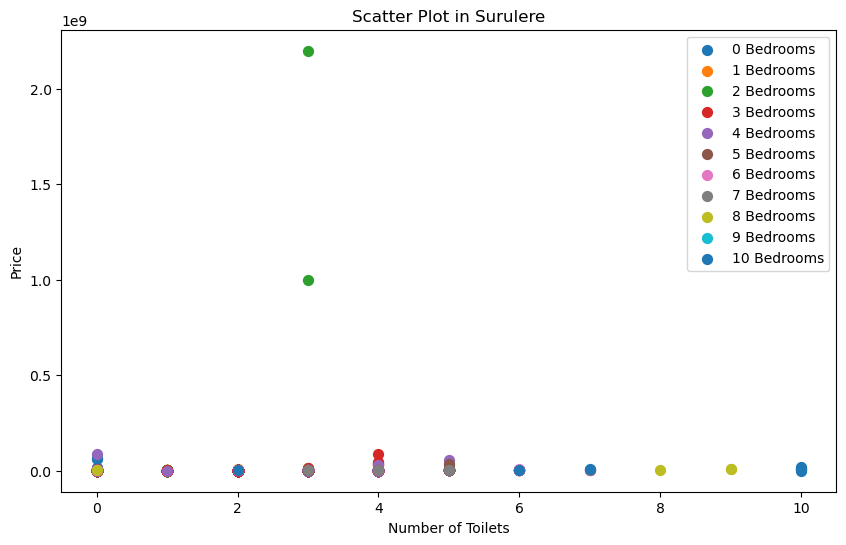

In [32]:
import matplotlib.pyplot as plt

def plt_scatter_city(df, City):
    # Set up the plot
    plt.figure(figsize=(10, 6))

    # Iterate over unique values of 'beds'
    for i in np.sort(df.beds.unique()):
        br = df[(df.City == City) & (df.beds == i)]
        
        # Scatter plot for each 'beds' value
        plt.scatter(br.toilets, br.price, label=f'{i} Bedrooms', s=50)

    plt.xlabel('Number of Toilets')
    plt.ylabel('Price')
    plt.title(f'Scatter Plot in {City}')
    plt.legend()
    
    plt.show()  # Display the plot

# Example usage
plt_scatter_city(df3, 'Surulere')


In [33]:
#function
#remove rows where the price of a property with 'n' 
#bedrooms is greater than the price of a property with 'n+1' bedrooms, 
#considering the same neighborhood and number of toilets.

In [34]:
def remove_higher_bedroom_prices(df2):
    df_sorted = df2.sort_values(by=['Neighborhood', 'beds', 'toilets', 'price'])
    mask = (df_sorted['price'].shift(-1) < df_sorted['price']) & (df_sorted['Neighborhood'] == df_sorted['Neighborhood'].shift(-1)) & (df_sorted['toilets'] == df_sorted['toilets'].shift(-1))
   

    filtered_df = df_sorted[~mask]
    return filtered_df

filteredf = remove_higher_bedroom_prices(df3)

filteredf.head(100)

,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood,beds,bathrooms,toilets,price
27203,"45,000/day",0,0,0,0 beds,0 baths,0 Toilets,Island,1004,0,0,0,45000
27635,"80,000",0,0,0,0 beds,0 baths,0 Toilets,Island,1004,0,0,0,80000
27637,"120,000",0,0,0,0 beds,0 baths,0 Toilets,Island,1004,0,0,0,120000
27198,"900,000/month",0,0,0,beds,baths,Toilets,Island,1004,0,0,0,900000
28774,"3,000,000",0,0,0,beds,baths,Toilets,Island,1004,0,0,0,3000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41359,"300,000",0,0,0,1 beds,1 baths,1 Toilets,Surulere,Adelabu,1,1,1,300000
41400,"300,000",0,0,0,1 beds,1 baths,1 Toilets,Surulere,Adelabu,1,1,1,300000
41663,"300,000",0,0,0,1 beds,1 baths,1 Toilets,Surulere,Adelabu,1,1,1,300000
41753,"300,000",0,0,0,1 beds,1 baths,1 Toilets,Surulere,Adelabu,1,1,1,300000


In [35]:
filteredf.shape

(53039, 13)

In [36]:
#the differences between df3 and filteredf

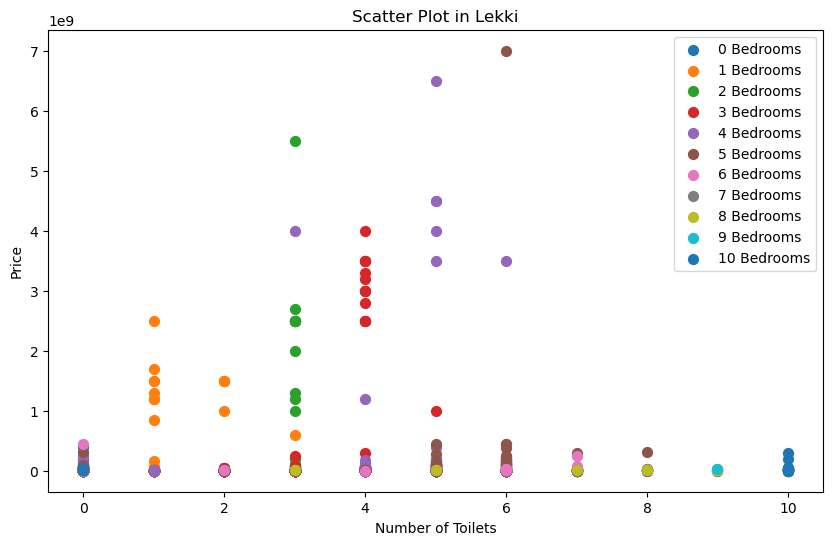

In [37]:
plt_scatter_city(filteredf, 'Lekki')

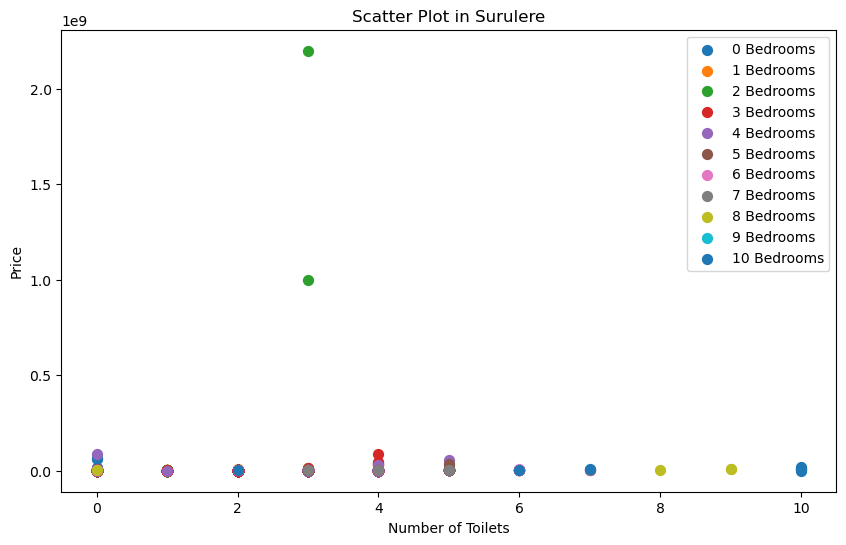

In [38]:
plt_scatter_city(df3, 'Surulere')

In [39]:
#dropping unncessary columns

In [40]:
filteredf.drop(['Price', 'Bathrooms', 'Bedrooms', 'Toilets'], axis = 1)

,Serviced,Newly Built,Furnished,City,Neighborhood,beds,bathrooms,toilets,price
27203,0,0,0,Island,1004,0,0,0,45000
27635,0,0,0,Island,1004,0,0,0,80000
27637,0,0,0,Island,1004,0,0,0,120000
27198,0,0,0,Island,1004,0,0,0,900000
28774,0,0,0,Island,1004,0,0,0,3000000
...,...,...,...,...,...,...,...,...,...
25143,0,1,1,Ikeja,alausa,5,5,6,5000000
25363,1,1,1,Ikeja,alausa,5,6,6,5500000
24594,0,0,0,Ikeja,alausa,5,5,6,10000000
24593,0,0,0,Ikeja,alausa,5,5,6,12000000


In [41]:
#Now looking at bathrooms and toilet

Text(0, 0.5, 'Count')

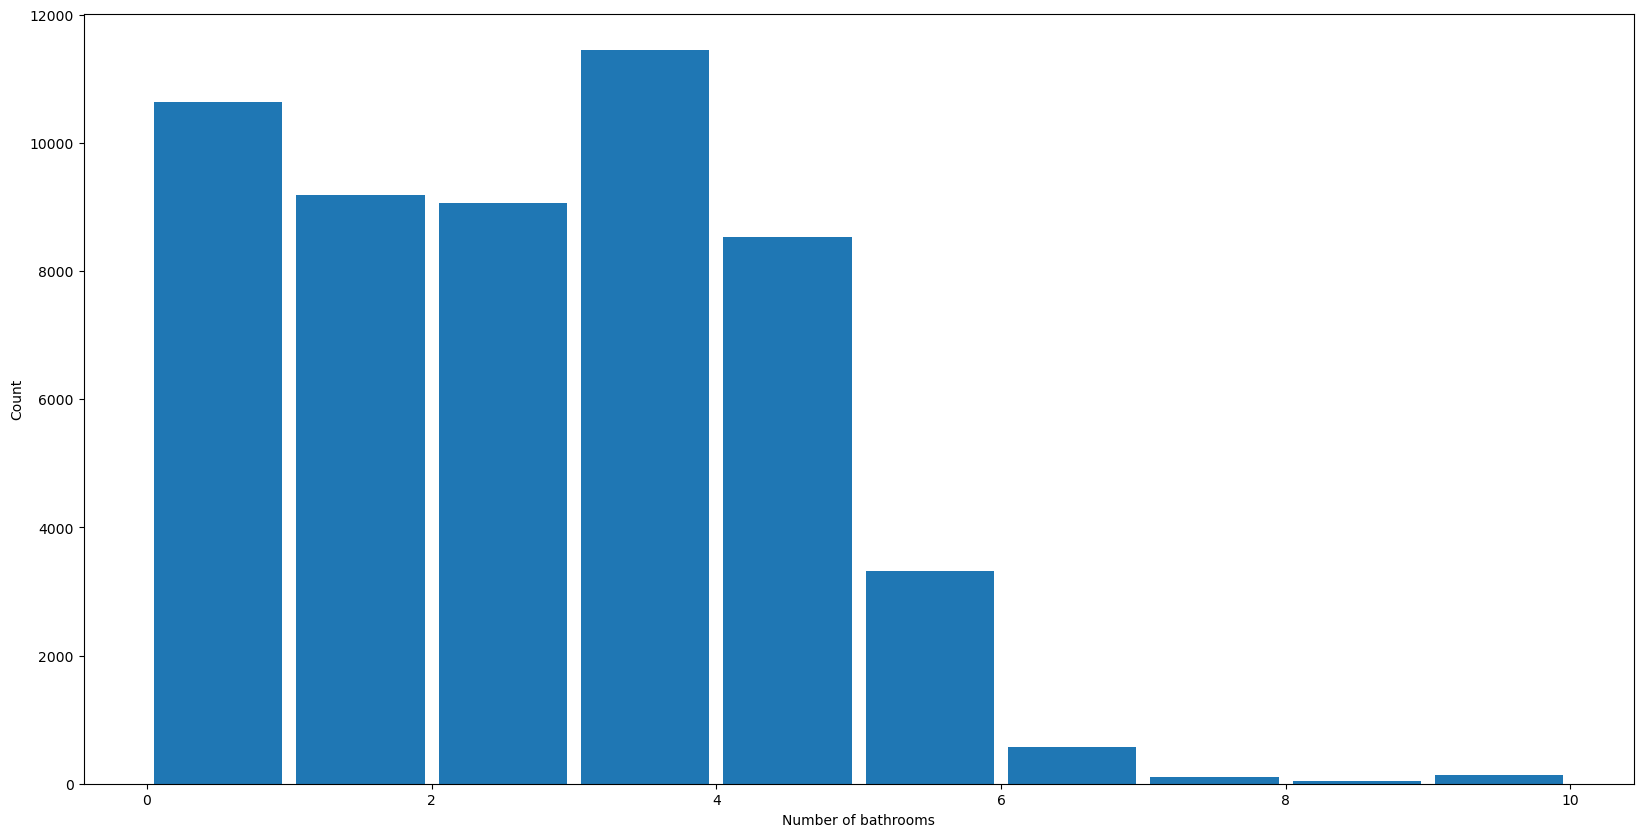

In [42]:
plt.hist(filteredf.bathrooms, rwidth = 0.9)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

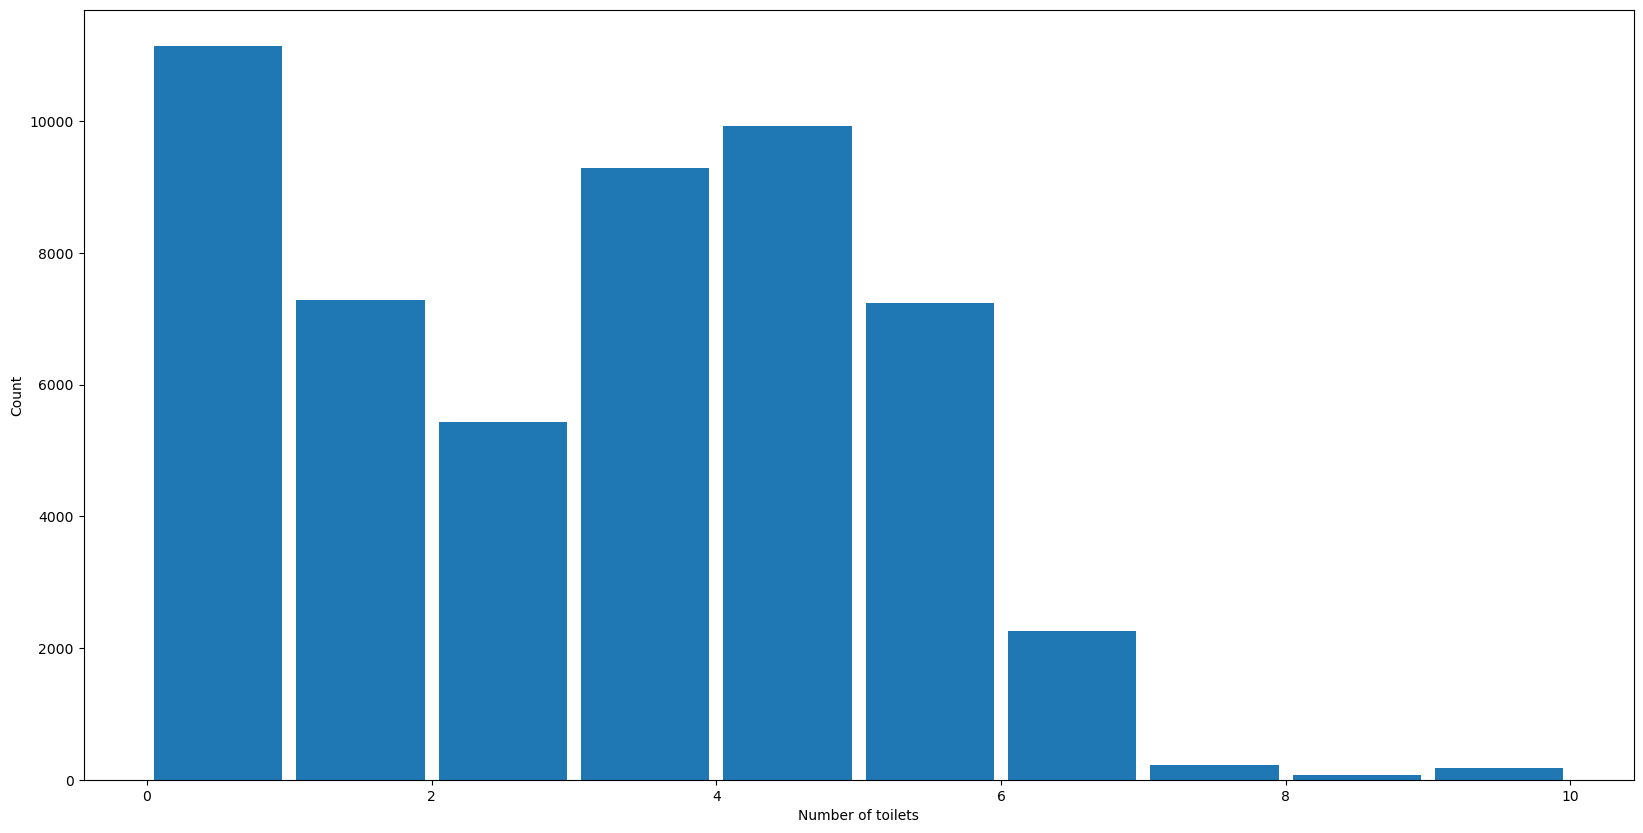

In [43]:
plt.hist(filteredf.toilets, rwidth = 0.9)
plt.xlabel('Number of toilets')
plt.ylabel('Count')

In [44]:
filteredf[filteredf.bathrooms > filteredf.beds+2]

,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood,beds,bathrooms,toilets,price
23587,"3,000,000/year",0,0,0,0 beds,3 baths,4 Toilets,Ikeja,Adeniyi Jones,0,3,4,3000000
25218,"31,344,300",0,0,0,1 beds,4 baths,8 Toilets,Ikeja,Adeniyi Jones,1,4,8,31344300
47622,"1,600,000",1,1,0,beds,3 baths,4 Toilets,Ajah,Ado,0,3,4,1600000
3373,"6,500,000",0,0,1,0 beds,5 baths,0 Toilets,Lekki,Agungi,0,5,0,6500000
20759,"15,000,000/year",0,0,0,0 beds,3 baths,4 Toilets,Ikoyi,Banana Island,0,3,4,15000000
12345,"2,700,000",1,1,0,3 beds,6 baths,6 Toilets,Lekki,Chevron,3,6,6,2700000
14615,"5,000,000",0,1,1,4 beds,8 baths,7 Toilets,Lekki,Chevron,4,8,7,5000000
24100,"7,000,000/year",0,0,0,0 beds,4 baths,4 Toilets,Ikeja,GRA,0,4,4,7000000
25593,"200,000",0,0,0,2 beds,5 baths,4 Toilets,Ikeja,GRA,2,5,4,200000
25901,"7,000,000/year",0,0,1,4 beds,7 baths,7 Toilets,Ikeja,GRA,4,7,7,7000000


In [45]:
df4 = filteredf[filteredf.bathrooms < filteredf.beds+2]
df4.shape

(52841, 13)

In [46]:
#dropping datapoint where bedrooms or bathromms or toilets = 0

In [47]:
df5 = df4[(df4['beds'] != 0) & (df4['bathrooms'] != 0) & (df4['toilets'] != 0)]


In [48]:
#model 

In [49]:
df5.head(3)

,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood,beds,bathrooms,toilets,price
28753,"2,200,000",1,0,1,1 beds,1 baths,1 Toilets,Island,1004,1,1,1,2200000
28757,"3,000,000",1,0,1,2 beds,1 baths,2 Toilets,Island,1004,2,1,2,3000000
29549,"3,800,000",0,0,1,2 beds,1 baths,2 Toilets,Island,1004,2,1,2,3800000


In [50]:
df6 = df5.drop(['Price', 'Bedrooms', 'Bathrooms', 'Toilets'], axis = 1)

In [51]:
df6.head()

,Serviced,Newly Built,Furnished,City,Neighborhood,beds,bathrooms,toilets,price
28753,1,0,1,Island,1004,1,1,1,2200000
28757,1,0,1,Island,1004,2,1,2,3000000
29549,0,0,1,Island,1004,2,1,2,3800000
27880,0,0,0,Island,1004,2,2,2,4000000
28747,0,0,1,Island,1004,2,2,2,4000000


In [52]:
#One hot Encoding on City and Neighborhood

In [53]:
#For City
df_hot_City = pd.get_dummies(df6.City).astype(int)
df_hot_City = df_hot_City.drop(['Yaba'], axis=1)
df_hot_City.head()


,Ajah,Gbagada,Ikeja,Ikoyi,Island,Lekki,Ojodu,Surulere
28753,0,0,0,0,1,0,0,0
28757,0,0,0,0,1,0,0,0
29549,0,0,0,0,1,0,0,0
27880,0,0,0,0,1,0,0,0
28747,0,0,0,0,1,0,0,0


In [54]:
#For Neighborhood
df_hot_Neighborhood = pd.get_dummies(df6.Neighborhood).astype(int)
df_hot_Neighborhood = df_hot_Neighborhood.drop(['alausa'], axis = 1)
df_hot_Neighborhood.head(3)



,1004,Adelabu,Adeniyi Jones,Adeola Odeku,Ado,Agoro,Aguda,Agungi,Akoka,Alagomeji,...,Other Victoria Island,Other Yaba,Oworonshoki,Parkview Estate,Randle Avenue,Sabo,Sangotedo,Soluyi,Toyin street,Victoria Island Extension
28753,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28757,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29549,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df6 = pd.concat([df6, df_hot_City, df_hot_Neighborhood], axis = 1)
df6.head(3)

,Serviced,Newly Built,Furnished,City,Neighborhood,beds,bathrooms,toilets,price,Ajah,...,Other Victoria Island,Other Yaba,Oworonshoki,Parkview Estate,Randle Avenue,Sabo,Sangotedo,Soluyi,Toyin street,Victoria Island Extension
28753,1,0,1,Island,1004,1,1,1,2200000,0,...,0,0,0,0,0,0,0,0,0,0
28757,1,0,1,Island,1004,2,1,2,3000000,0,...,0,0,0,0,0,0,0,0,0,0
29549,0,0,1,Island,1004,2,1,2,3800000,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
len(df6)

41061

In [57]:
df7 = df6.drop(['City', 'Neighborhood','Serviced'], axis = 1)

In [58]:
len(df7)

41061

In [59]:
df7.rename(columns={'beds': 'bedrooms'}, inplace=True)

In [60]:
df7[df7.bedrooms>5].head(20)

,Newly Built,Furnished,bedrooms,bathrooms,toilets,price,Ajah,Gbagada,Ikeja,Ikoyi,...,Other Victoria Island,Other Yaba,Oworonshoki,Parkview Estate,Randle Avenue,Sabo,Sangotedo,Soluyi,Toyin street,Victoria Island Extension
38277,0,0,6,4,4,3500000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39762,0,0,6,5,6,5000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40032,0,0,6,6,7,4000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40637,1,1,6,6,7,4000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39755,0,0,8,8,8,5000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26144,0,0,6,6,6,6500000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23910,0,0,6,6,6,8000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
26403,0,0,6,6,7,3500000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
26404,0,1,6,7,7,3500000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
26972,0,0,6,6,7,10000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#setting X and y

In [62]:
X = df7.drop(['price'], axis = 1)
y = df7['price']

In [63]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor

# Convert 'y' to a NumPy array and reshape
y_array = np.array(y).reshape(-1, 1)

# Apply Box-Cox transformation to the target variable
pt = PowerTransformer(method='box-cox')
y_transformed = pt.fit_transform(y_array).flatten()



In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.1, random_state = 123)

In [65]:
sv = SVR(kernel = 'rbf')


In [66]:
sv_ = TransformedTargetRegressor(regressor=sv, transformer=PowerTransformer(), check_inverse=False)

In [112]:
sv_.fit(X_train, y_train)

TransformedTargetRegressor(check_inverse=False, regressor=SVR(),
                           transformer=PowerTransformer())

In [108]:
sv_.score(X_test, y_test)

0.592039367304228

In [ ]:
sv_final.score(X_test, y_test)

In [104]:
def predict_price(City, Neighborhood, Newly_built, Furnished, bedrooms, bathrooms, toilets):
    try:
        city_index = np.where(X_test.columns == City)[0][0] 
        nei_index = np.where(X_test.columns == Neighborhood)[0][0]
    except IndexError:
        print(f"City '{City}' or Neighborhood '{Neighborhood}' not found in columns.")
        return None  

    x = np.zeros(len(X_test.columns))
    x[0] = Newly_built
    x[1] = Furnished
    x[2] = bedrooms
    x[3] = bathrooms
    x[4] = toilets
    if city_index >= 0:
        x[city_index] = 1
    if nei_index >= 0:
        x[nei_index] = 1


    prediction_transformed = sv_.predict([x])[0]
    prediction_actual = pt.inverse_transform([[prediction_transformed]])[0, 0]
    
    return prediction_actual




 

In [105]:
predict_price('Lekki','Ajah', 1,2,4,1,1)

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "The feature names should match those that were passed during fit.\n"


1137769.8081961223

In [111]:
#pickle file
import pickle
with open('lagos_home_prices_model.pickle', 'wb') as f:
    pickle.dump(sv_,f)

In [87]:
#json file 
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))